In [45]:
from __future__ import print_function

import pandas as pd
import numpy as np

from skimage.color import grey2rgb
from skimage.transform import resize

from random import randint
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
%matplotlib inline

In [46]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [47]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
print ('training set shape:', df_train.shape)
print ('test set shape:', df_test.shape)

training set shape: (42000, 785)
test set shape: (28000, 784)


In [49]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [50]:
print ('training set null values:', df_train.isnull().all().sum())
print ('test set null values:', df_test.isnull().all().sum())

training set null values: 0
test set null values: 0


In [51]:
df_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [52]:
X_train = df_train.iloc[:, 1:].values
Y_train = df_train.iloc[:, 0].values
X_test = df_test.iloc[:, :].values

X_train = X_train.reshape(-1, 28, 28)
Y_train = to_categorical(Y_train, num_classes=10)
X_test = X_test.reshape(-1, 28, 28)
print ('X train shape:', X_train.shape)
print ('Y_train shape:', Y_train.shape)
print ('X_test shape:', X_test.shape)

X train shape: (42000, 28, 28)
Y_train shape: (42000, 10)
X_test shape: (28000, 28, 28)


In [53]:
def preprocess (images, dim=(224, 224)):
    images = images.astype('float32')/255
    
    new_images = np.empty((images.shape[0], dim[0], dim[1]))
    for i in range(images.shape[0]):
        new_images[i] = resize(images[i], dim)

    del(images)
    return grey2rgb(new_images)

In [54]:
X_train = preprocess(X_train, dim=(48, 48))
X_test = preprocess(X_test, dim=(48, 48))

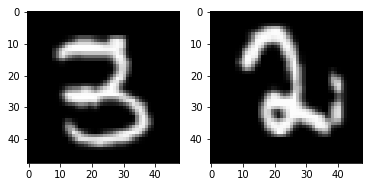

In [59]:
rnd1 = randint(0, X_train.shape[0])
rnd2 = randint(0, X_test.shape[0])
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X_train[rnd1], cmap='gray')
ax[1].imshow(X_test[rnd2], cmap='gray')

In [60]:
np.save('X_train.npy', X_train)
np.save('Y_train.npy', Y_train)
np.save('X_test.npy', X_test)